In [107]:
import pandas as pd
from src.utils import fileio

import json


TREATMENTS = ['CS_10D', 'Cs_5DIZ', 'CsCh']

result = pd.DataFrame()
for TREATMENT in TREATMENTS:
    file_path = f"/home/milky/sci/drosophila-isolation/r-scripts/res/choice_model/{TREATMENT}"
    groups = fileio.load_files_from_folder(file_path, '.json')

    cols = ["Estimate", "Std. Error", "z-value", "Pr(>|z|)"]
    rows_choice = ["inertia", "recip_w288", "indeg_w864", "outdeg_w864", "trans_w864", "sim_activity", "sim_popularity"]
    
    for group_name, group_path in groups.items():
        with open(group_path, "r") as file:
            data = json.load(file)
            choice_model = pd.DataFrame(data["coefMat"])
            choice_model.columns = cols
            choice_model["meausre"] = rows_choice 
            choice_model["model"] = "choice_model" 
            choice_model["group_name"] = group_name
            choice_model["treatment"] = TREATMENT
            choice_model.set_index(['treatment', 'group_name', 'model', "meausre"], inplace=True)
            
            result = pd.concat([result, choice_model], axis=0)


    file_path = f"/home/milky/sci/drosophila-isolation/r-scripts/res/rate_model/{TREATMENT}"
    groups = fileio.load_files_from_folder(file_path, '.json')
    rows_rate = ["1", "indeg_w864", "outdeg_w864", "ego_bursty", "ego_influence_pos", "ego_influence_neg"]
    for group_name, group_path in groups.items():
        with open(group_path, "r") as file:
            data = json.load(file)
            rate_model = pd.DataFrame(data["coefMat"])
            rate_model.columns = cols
            rate_model["measure"] = rows_rate 
            rate_model["model"] = "rate_model" 
            rate_model["group_name"] = group_name
            rate_model["treatment"] = TREATMENT
            rate_model.set_index(['treatment', 'group_name', 'model', "measure"], inplace=True)

            result = pd.concat([result, rate_model], axis=0)

    # result = result[['Estimate', 'Std. Error']]
    result = result.rename_axis(index={'treatment': 'network_type', 'group_name': 'networkID', 'model': 'model', 'measure': 'measure'})


In [134]:
result.tail(15)

Estimate   
                                   model                                    
CsCh CsCh_A1_25_05_2023-12_44.json rate_model ego_bursty          -0.0006  \
                                              ego_influence_pos    0.0079   
                                              ego_influence_neg   -0.0069   
     CsCh_A2_19_04_2023-12_08.json rate_model 1                   -5.1491   
                                              indeg_w864           0.0544   
                                              outdeg_w864          0.0225   
                                              ego_bursty          -0.0028   
                                              ego_influence_pos    0.0075   
                                              ego_influence_neg   -0.0295   
     CsCh_A3_21_04_2023-11_08.json rate_model 1                   -4.9548   
                                              indeg_w864           0.0444   
                                              outdeg_w864         -0.0014   
                                              ego_bursty          -0.0010   
                                              ego_influence_pos   -0.0023   
                                              ego_influence_neg   -0.0206   

                                                                 Std. Error   
                                   model                                      
CsCh CsCh_A1_25_05_2023-12_44.json rate_model ego_bursty             0.0006  \
                                              ego_influence_pos      0.0222   
                                              ego_influence_neg      0.0196   
     CsCh_A2_19_04_2023-12_08.json rate_model 1                      0.0911   
                                              indeg_w864             0.0084   
                                              outdeg_w864            0.0083   
                                              ego_bursty             0.0007   
                                              ego_influence_pos      0.0251   
                                              ego_influence_neg      0.0221   
     CsCh_A3_21_04_2023-11_08.json rate_model 1                      0.0833   
                                              indeg_w864             0.0067   
                                              outdeg_w864            0.0071   
                                              ego_bursty             0.0006   
                                              ego_influence_pos      0.0211   
                                              ego_influence_neg      0.0193   

                                                                 z-value   
                                   model                                   
CsCh CsCh_A1_25_05_2023-12_44.json rate_model ego_bursty         -1.0415  \
                                              ego_influence_pos   0.3572   
                                              ego_influence_neg  -0.3535   
     CsCh_A2_19_04_2023-12_08.json rate_model 1                 -56.5321   
                                              indeg_w864          6.4852   
                                              outdeg_w864         2.7107   
                                              ego_bursty         -4.0897   
                                              ego_influence_pos   0.2991   
                                              ego_influence_neg  -1.3357   
     CsCh_A3_21_04_2023-11_08.json rate_model 1                 -59.4927   
                                              indeg_w864          6.6067   
                                              outdeg_w864        -0.2026   
                                              ego_bursty         -1.7424   
                                              ego_influence_pos  -0.1103   
                                              ego_influence_neg  -1.0684   

                                                                     Pr(>|z|)  
                                   mod

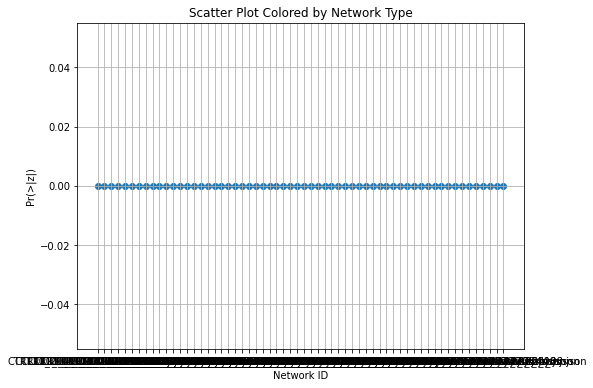

In [139]:
import matplotlib.pyplot as plt

filtered_df  = result.loc[(slice(None), slice(None), slice(None), '1')]["Pr(>|z|)"]

filtered_df_reset = filtered_df.reset_index()

filtered_df_reset.columns = ['network_type', 'networkID', 'model', 'Pr(>|z|)']

# Scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    filtered_df_reset['networkID'],  # x-axis: networkID
    filtered_df_reset['Pr(>|z|)'],  # y-axis: Pr(>|z|)
    label=filtered_df_reset['network_type']
)

# Add labels and legend
plt.xlabel('Network ID')  # Corresponding to networkID (from group_name)
plt.ylabel('Pr(>|z|)')
plt.title('Scatter Plot Colored by Network Type')
# plt.legend(handles=scatter.legend_elements()[0], labels=['A', 'B'], title="Network Type")
plt.grid(True)
plt.show()

In [115]:
filtered_df_reset

,level_0,level_1,model,Pr(>|z|)
0,CS_10D,CTRL10_29_01_2024_09_57_A3.json,choice_model,2.000000e-04
1,CS_10D,CTRL10_14_02_2024_11_04_A2.json,choice_model,8.543000e-01
2,CS_10D,CTRL10_29_01_2024_12_32_A1.json,choice_model,1.005000e-01
3,CS_10D,CTRL10_29_01_2024_09_57_A2.json,choice_model,5.181000e-01
4,CS_10D,CTRL10_29_01_2024_12_32_A2.json,choice_model,1.735000e-01
5,CS_10D,CTRL10_29_01_2024_12_32_A4.json,choice_model,0.000000e+00
6,CS_10D,CTRL10_14_02_2024_11_04_A1.json,choice_model,3.450000e-02
7,CS_10D,CTRL10_29_01_2024_10_43_A4.json,choice_model,3.365000e-01
8,CS_10D,CTRL10_30_01_2024_09_35_A3.json,choice_model,6.200000e-03
9,CS_10D,CTRL10_29_01_2024_10_43_A2.json,choice_model,3.500000e-03
